In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Load datasets
trades = pd.read_csv("/content/historical_data.csv")
fear_greed = pd.read_csv("/content/fear_greed_index.csv")

# Convert trades timestamp
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['Date'] = pd.to_datetime(trades['Timestamp IST'].dt.date)

# Convert fear_greed timestamp (Unix seconds → IST)
fear_greed['timestamp'] = pd.to_datetime(fear_greed['timestamp'], unit='s', utc=True)
fear_greed['timestamp'] = fear_greed['timestamp'].dt.tz_convert('Asia/Kolkata')
fear_greed['Date'] = pd.to_datetime(fear_greed['timestamp'].dt.date)

# Merge on Date
merged_df = pd.merge(trades, fear_greed[['Date', 'classification']], on="Date", how="inner")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Show first 50 rows
display(merged_df.head(20))


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,2024-02-12 22:50:00,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,2024-02-12,Greed
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,2024-02-12 22:50:00,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,2024-02-12,Greed
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,2024-02-12 22:50:00,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,2024-02-12,Greed
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,2024-02-12 22:50:00,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,2024-02-12,Greed
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,2024-02-12 22:50:00,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,2024-02-12,Greed


In [20]:
print("Dataset shape:", merged_df.shape)
print("\nMissing values:\n", merged_df.isnull().sum())
print("\nClassification distribution:\n", merged_df['classification'].value_counts())

# Summary statistics for numeric columns
display(merged_df.describe())


Dataset shape: (35864, 18)

Missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
classification      0
dtype: int64

Classification distribution:
 classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,Date
count,35864.000000,3.586400e+04,3.586400e+04,35864,3.586400e+04,35864.000000,3.586400e+04,35864.000000,3.586400e+04,3.586400e+04,35864
mean,7596.431745,1.004709e+04,4.920359e+03,2024-11-29 15:03:36.594914560,2.701678e+04,101.070948,5.844251e+10,1.028091,5.619946e+14,1.732824e+12,2024-11-29 03:00:33.727414784
min,0.000005,5.630000e-06,0.000000e+00,2023-01-05 01:06:00,-1.050000e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,2023-01-05 00:00:00
25%,3.245975,2.588700e+00,1.665300e+02,2024-09-12 12:47:00,-2.638983e+02,0.000000,5.240387e+10,0.012518,2.780000e+14,1.730000e+12,2024-09-12 00:00:00
50%,16.390000,2.820000e+01,5.979050e+02,2025-01-05 07:06:00,7.010137e+01,0.000000,6.815193e+10,0.084384,5.620000e+14,1.740000e+12,2025-01-05 00:00:00
75%,172.590000,1.990000e+02,2.220243e+03,2025-03-04 13:18:00,1.090053e+04,10.735428,7.641909e+10,0.398132,8.460000e+14,1.740000e+12,2025-03-04 00:00:00
max,103265.000000,1.582244e+07,1.190250e+06,2025-05-02 23:59:00,3.050948e+07,71535.716740,9.014923e+10,212.298921,1.130000e+15,1.750000e+12,2025-05-02 00:00:00
std,23547.203213,2.060973e+05,2.203314e+04,NaN,4.308246e+05,1364.610762,2.240666e+10,4.937482,3.262737e+14,1.082266e+10,NaN


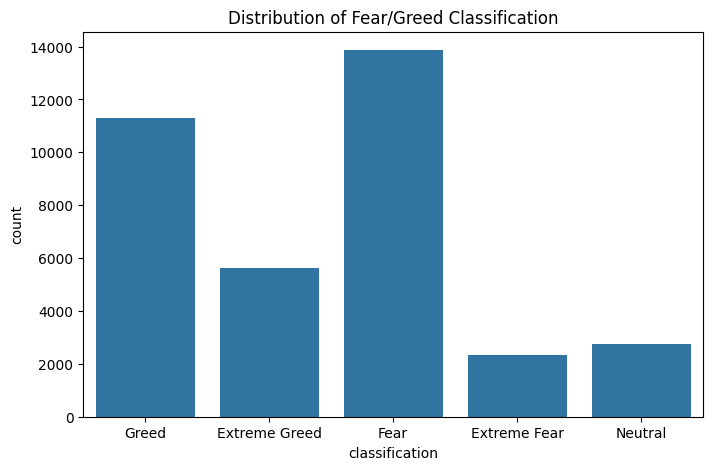

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification')
plt.title("Distribution of Fear/Greed Classification")
plt.show()


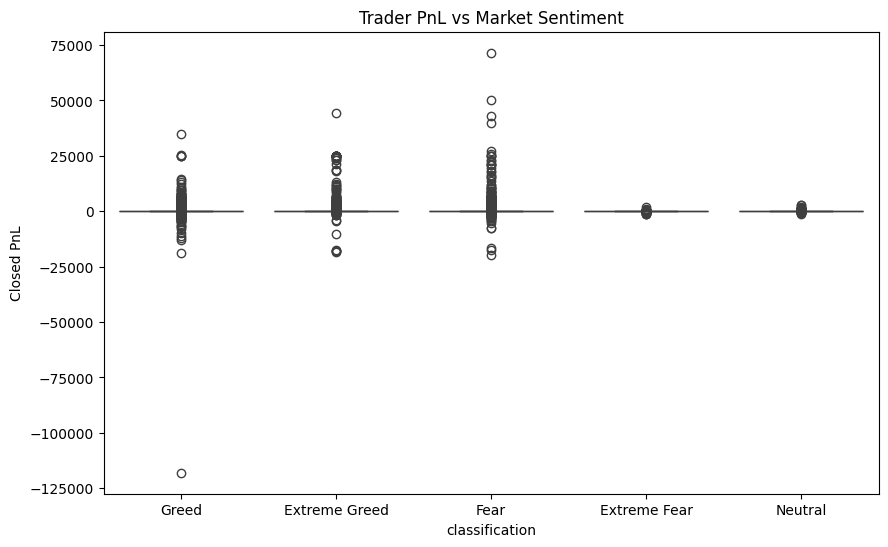

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Trader PnL vs Market Sentiment")
plt.show()


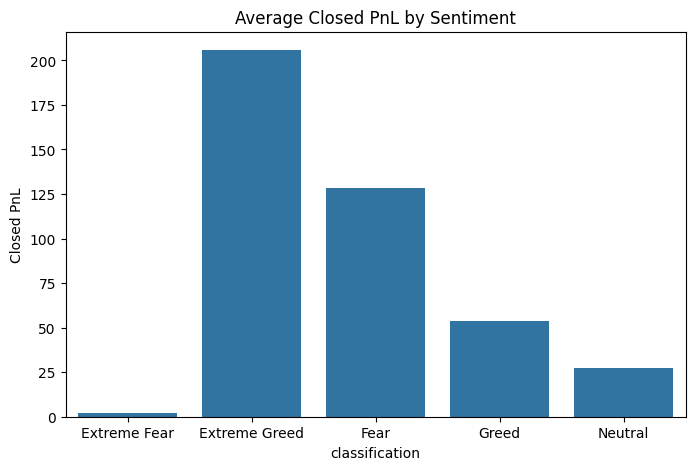

In [23]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_pnl, x='classification', y='Closed PnL')
plt.title("Average Closed PnL by Sentiment")
plt.show()


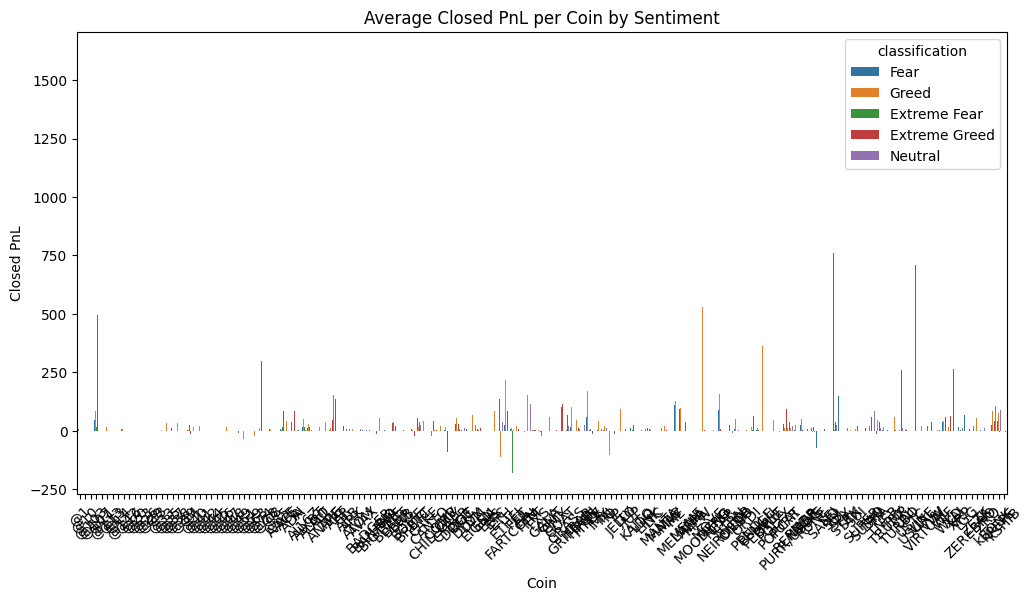

In [24]:
coin_pnl = merged_df.groupby(['Coin', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=coin_pnl, x='Coin', y='Closed PnL', hue='classification')
plt.title("Average Closed PnL per Coin by Sentiment")
plt.xticks(rotation=45)
plt.show()


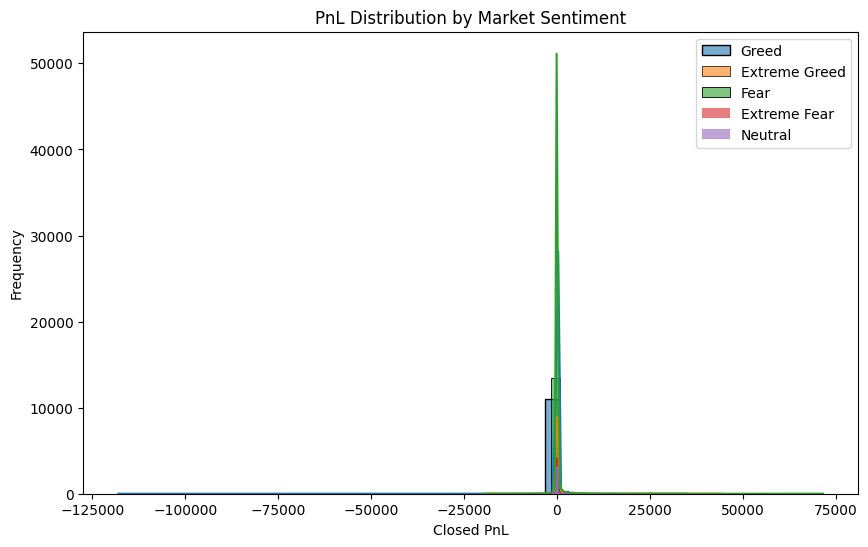

In [26]:
# 📊 Cell 7 — PnL distribution by sentiment
plt.figure(figsize=(10, 6))
for sentiment in merged_df['classification'].unique():
    subset = merged_df[merged_df['classification'] == sentiment]
    sns.histplot(subset['Closed PnL'], label=sentiment, kde=True, bins=40, alpha=0.6)
plt.title("PnL Distribution by Market Sentiment")
plt.xlabel("Closed PnL")
plt.ylabel("Frequency")
plt.legend()
plt.show()

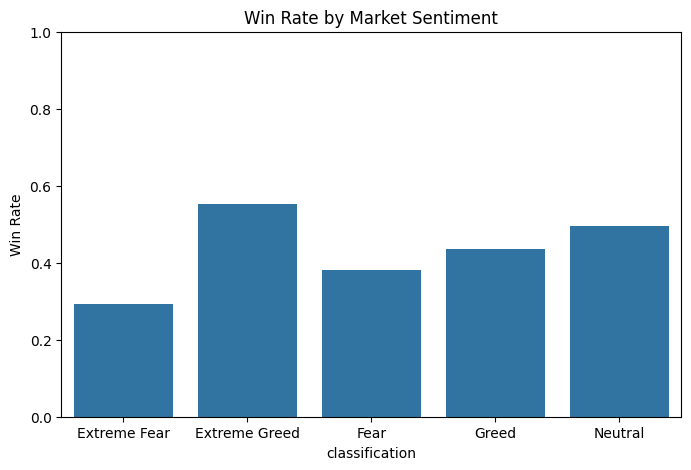

In [27]:
# 📊 Cell 8 — Win rate by sentiment
merged_df['win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['win'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=win_rate, x='classification', y='win')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()


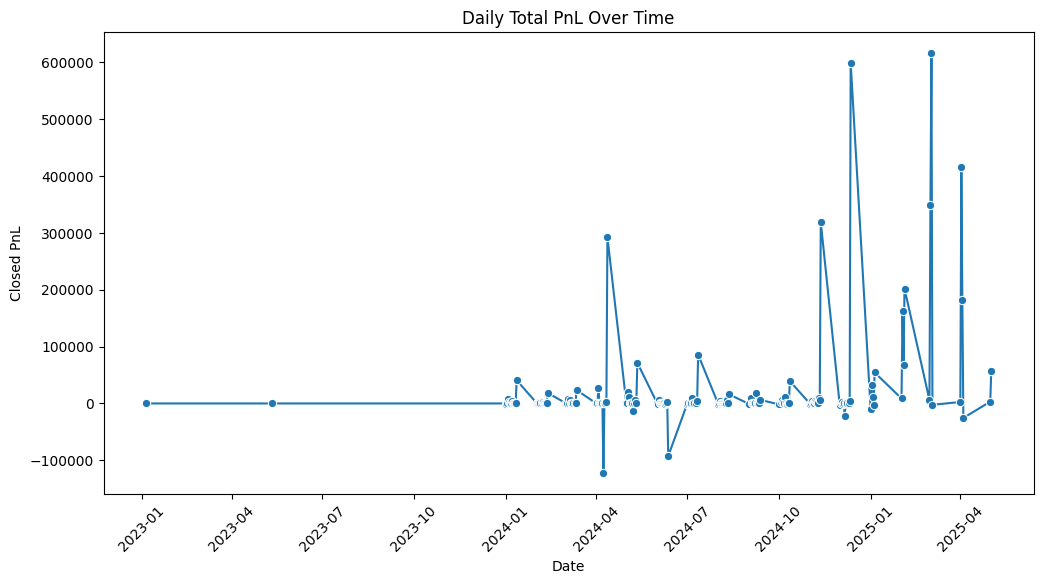

In [28]:

# 📊 Cell 9 — Daily total PnL trend
daily_pnl = merged_df.groupby('Date')['Closed PnL'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_pnl, x='Date', y='Closed PnL', marker='o')
plt.title("Daily Total PnL Over Time")
plt.xticks(rotation=45)
plt.show()

In [29]:
# 📊 Cell 10 — Statistical test: Fear vs Greed
from scipy import stats
fear_pnl = merged_df[merged_df['classification'].str.lower() == 'fear']['Closed PnL']
greed_pnl = merged_df[merged_df['classification'].str.lower() == 'greed']['Closed PnL']

t_stat, p_val = stats.ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-test between Fear and Greed PnL: t={t_stat:.4f}, p={p_val:.4f}")
if p_val < 0.05:
    print("✅ Significant difference detected between Fear and Greed PnL.")
else:
    print("⚠️ No statistically significant difference detected.")


T-test between Fear and Greed PnL: t=4.2659, p=0.0000
✅ Significant difference detected between Fear and Greed PnL.


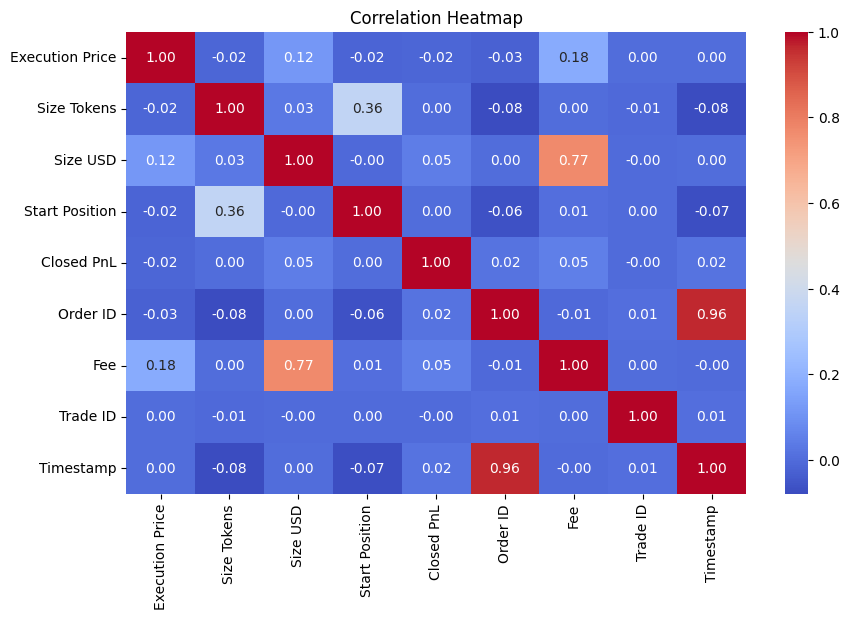

In [30]:
# 📊 Cell 11 — Correlation heatmap
numeric_cols = merged_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


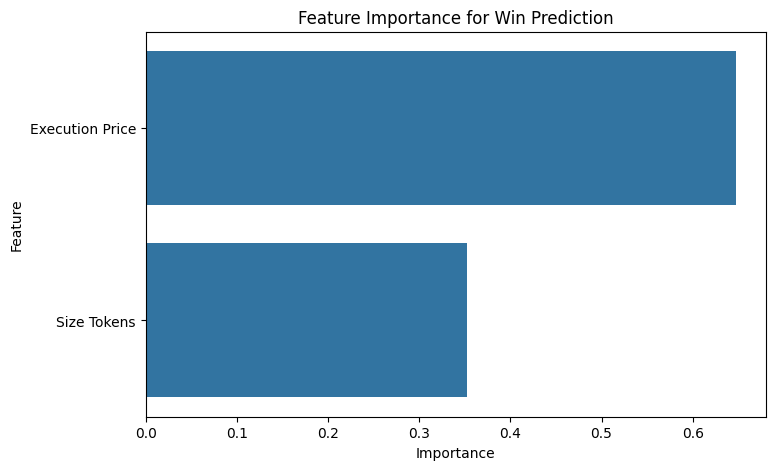

In [34]:
# 📊 Cell 12 — Feature importance (Random Forest Classifier for win prediction)
feature_cols = ['Size Tokens', 'Execution Price']  # change if different column names
X = merged_df[feature_cols].fillna(0)
y = merged_df['win'].astype(int)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.DataFrame({'Feature': feature_cols, 'Importance': model.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances, x='Importance', y='Feature')
plt.title("Feature Importance for Win Prediction")
plt.show()


📄 PDF report saved as trading_sentiment_report.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

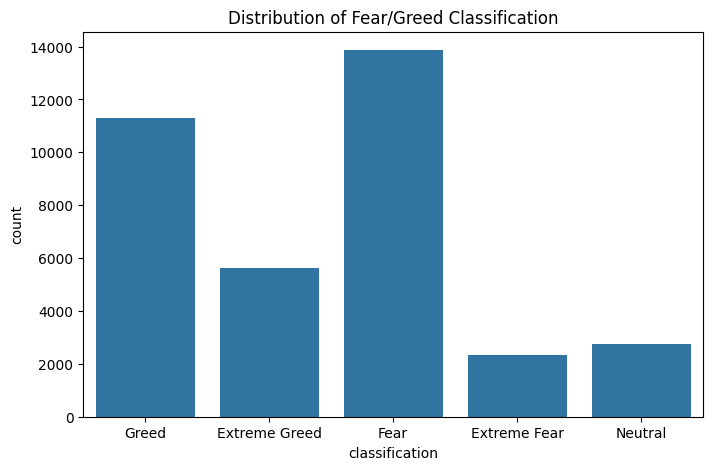

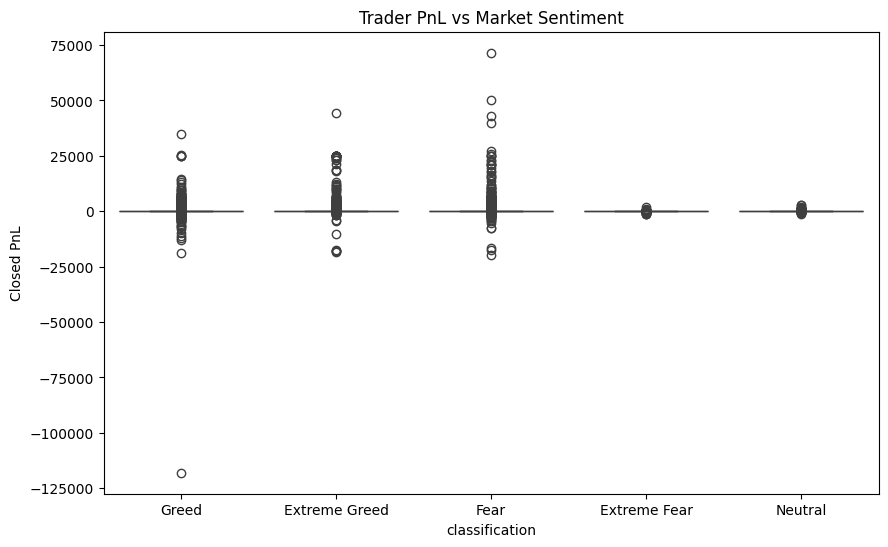

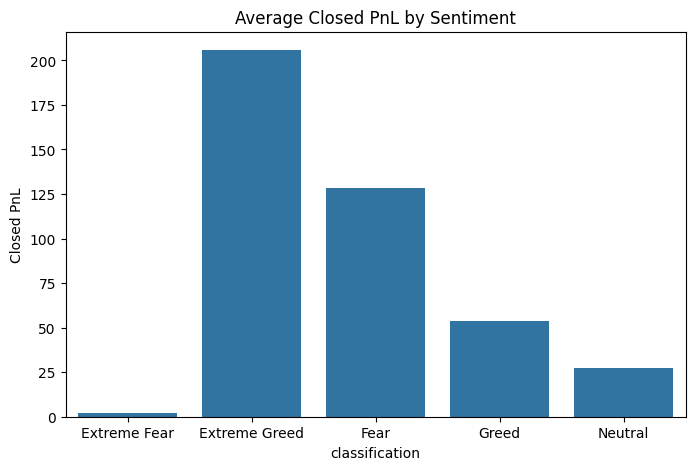

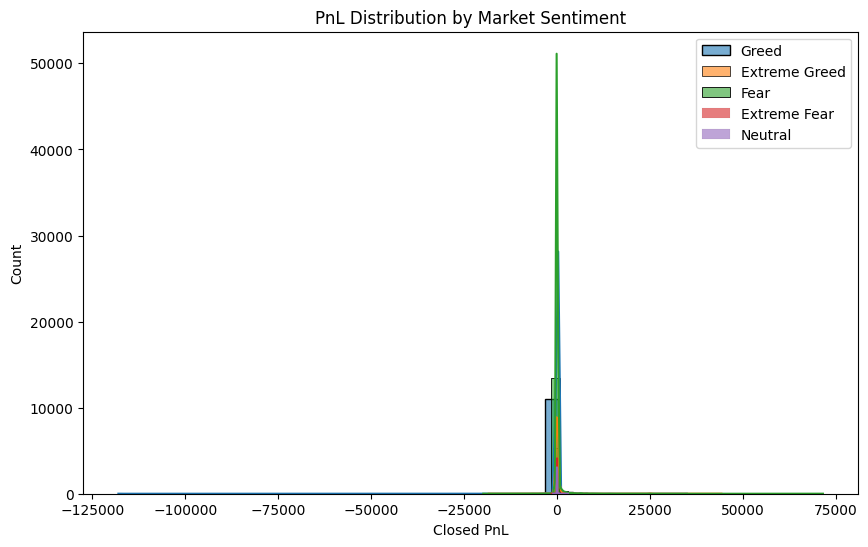

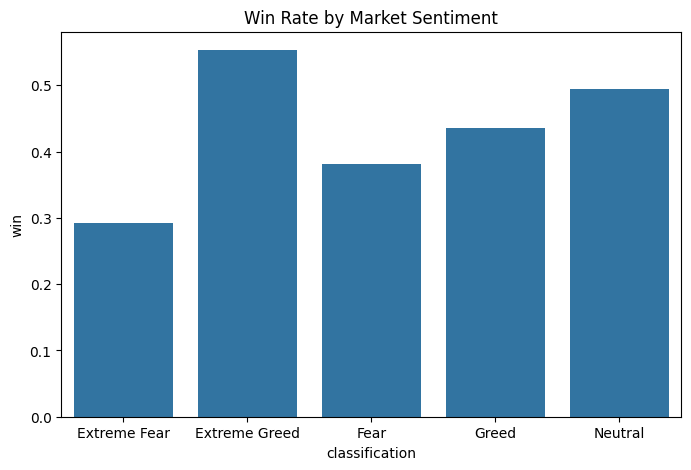

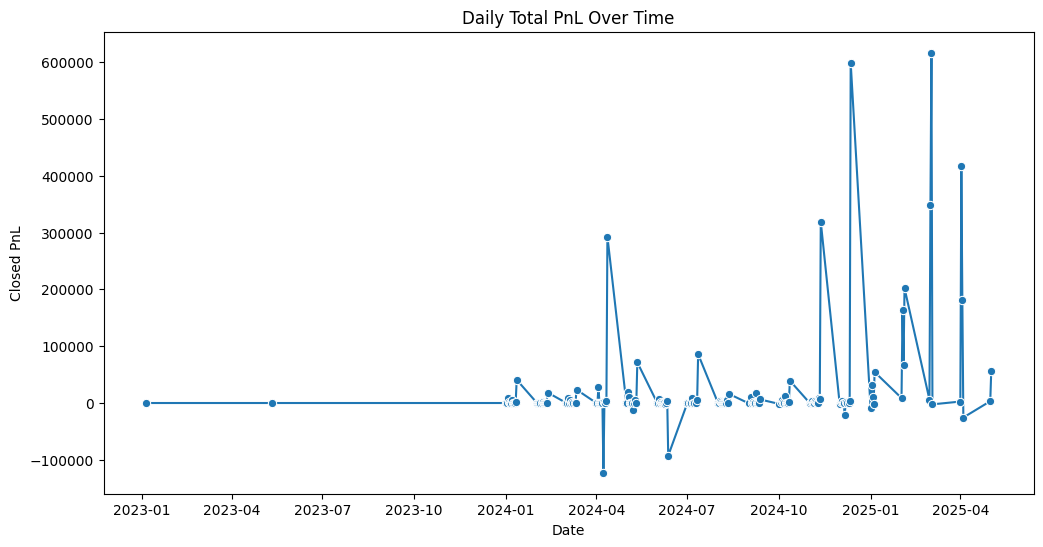

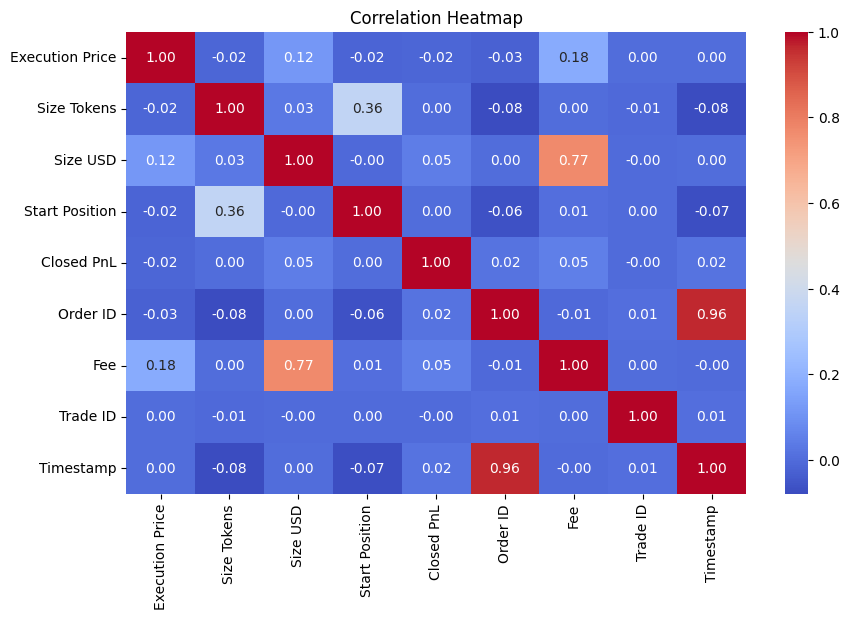

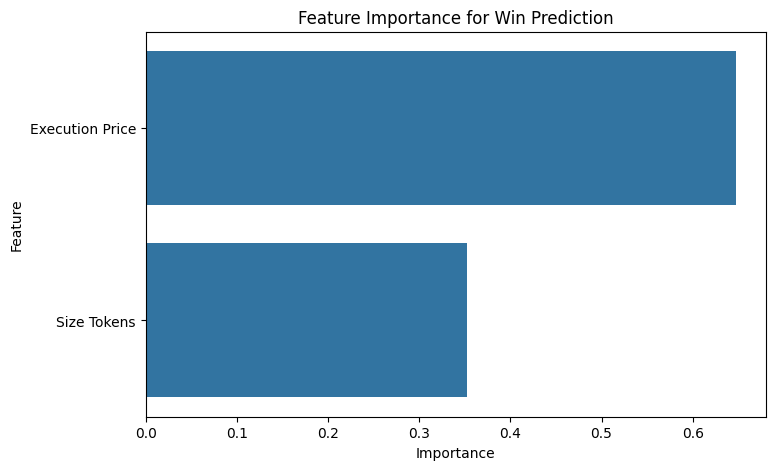

In [37]:
from matplotlib.backends.backend_pdf import PdfPages
import sys

pdf_filename = 'trading_sentiment_report.pdf'

with PdfPages(pdf_filename) as pdf:
    # Classification distribution
    fig1 = plt.figure(figsize=(8, 5))
    sns.countplot(data=merged_df, x='classification')
    plt.title("Distribution of Fear/Greed Classification")
    pdf.savefig(fig1)

    # PnL vs Market Sentiment
    fig2 = plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
    plt.title("Trader PnL vs Market Sentiment")
    pdf.savefig(fig2)

    # Average Closed PnL by Sentiment
    fig3 = plt.figure(figsize=(8, 5))
    sns.barplot(data=avg_pnl, x='classification', y='Closed PnL')
    plt.title("Average Closed PnL by Sentiment")
    pdf.savefig(fig3)

    # PnL distribution
    fig4 = plt.figure(figsize=(10, 6))
    for sentiment in merged_df['classification'].unique():
        subset = merged_df[merged_df['classification'] == sentiment]
        sns.histplot(subset['Closed PnL'], label=sentiment, kde=True, bins=40, alpha=0.6)
    plt.title("PnL Distribution by Market Sentiment")
    plt.legend()
    pdf.savefig(fig4)

    # Win rate
    fig5 = plt.figure(figsize=(8, 5))
    sns.barplot(data=win_rate, x='classification', y='win')
    plt.title("Win Rate by Market Sentiment")
    pdf.savefig(fig5)

    # Daily PnL trend
    fig6 = plt.figure(figsize=(12, 6))
    sns.lineplot(data=daily_pnl, x='Date', y='Closed PnL', marker='o')
    plt.title("Daily Total PnL Over Time")
    pdf.savefig(fig6)

    # Correlation heatmap
    fig7 = plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    pdf.savefig(fig7)

    # Feature importance
    fig8 = plt.figure(figsize=(8, 5))
    sns.barplot(data=importances, x='Importance', y='Feature')
    plt.title("Feature Importance for Win Prediction")
    pdf.savefig(fig8)

print(f"📄 PDF report saved as {pdf_filename}")

# ✅ Auto-download if running in Google Colab
if 'google.colab' in sys.modules:
    from google.colab import files
    files.download(pdf_filename)
